## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
data = pd.read_csv("owid-covid-data (5).csv", index_col="date")

In [3]:
data.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
data.index = pd.to_datetime(data.index)

## Cleaning the data

In [5]:
world_data = data[data["iso_code"] == "OWID_WRL"]
continent_data = data[(data["iso_code"] == "OWID_AFR") | (data["iso_code"] == "OWID_ASI") | (data["iso_code"] == "OWID_EUR") | (data["iso_code"] == "OWID_NAM") | (data["iso_code"] == "OWID_OCE") | (data["iso_code"] == "OWID_SAM")]
country_data = data[data["iso_code"].apply(lambda x : len(x) == 3)]

In [6]:
world_map_df = country_data[country_data.index == (datetime.datetime.today() - datetime.timedelta(days=1)).strftime('%Y-%m-%d')]

In [ ]:
world_data['7_days_moving_average_new_cases'] = world_data['new_cases'].rolling(7).mean()
world_data['7_days_moving_average_new_deaths'] = world_data['new_deaths'].rolling(7).mean()

In [8]:
date = (datetime.datetime.today() - datetime.timedelta(days=3)).strftime ('%Y-%m-%d')

top_10_countries_by_total_cases = country_data[country_data.index == date].sort_values(["total_cases"], ascending=False).head(10)["iso_code"].values.tolist()
top_10_countries_by_total_cases_df = data[data["iso_code"].apply(lambda x : x in top_10_countries_by_total_cases)]

top_10_countries_by_total_deaths = country_data[country_data.index == date].sort_values(["total_deaths"], ascending=False).head(10)["iso_code"].values.tolist()
top_10_countries_by_total_deaths_df = data[data["iso_code"].apply(lambda x : x in top_10_countries_by_total_deaths)]

top_10_countries_by_people_vaccinated = country_data[country_data.index == date].sort_values(["people_vaccinated"], ascending=False).head(10)["iso_code"].values.tolist()
top_10_countries_by_people_vaccinated_df = data[data["iso_code"].apply(lambda x : x in top_10_countries_by_people_vaccinated)]

## Exploratory Data Analysis (EDA)

Total Cases (worldwide)

In [9]:
px.line(world_data, y="total_cases", title="Total Cases (worldwide)")

Daily Cases (worldwide)

In [10]:
px.line(world_data, y=["new_cases", "7_days_moving_average_new_cases"], title="Daily Cases (worldwide)")

Total Deaths (worldwide)

In [11]:
px.line(world_data, y="total_deaths", title="Total Deaths (worldwide)")

Daily Deaths (worldwide)

In [12]:
px.line(world_data, y=["new_deaths", "7_days_moving_average_new_deaths"], title="Daily Deaths (worldwide)")

Total Cases by continent

In [13]:
px.line(continent_data, y="total_cases", color="location", title="Total Cases by continent")

Total Deaths by continent

In [14]:
px.line(continent_data, y="total_deaths", color="location", title="Total Deaths by continent")

Total Cases (top 10 countries)

In [15]:
px.line(top_10_countries_by_total_cases_df, y="total_cases", color="location", title="Total Cases (top 10 countries)")

Total Deaths (top 10 countries)

In [16]:
px.line(top_10_countries_by_total_deaths_df, y="total_deaths", color="location", title="Total Deaths (top 10 countries)")

Total Vaccinations (worldwide)

In [17]:
px.line(world_data[world_data["people_vaccinated"].notna()], y=["people_vaccinated", "people_fully_vaccinated", "total_boosters"], title="Total Vaccinations (worldwide)")

Total Vaccinations by continent

In [18]:
px.line(continent_data[continent_data["people_vaccinated"].notna()], y="people_vaccinated", color="location", title="Total Vaccinations by continent")

Total Vaccinations (top 10 countries)

In [19]:
px.line(top_10_countries_by_people_vaccinated_df[top_10_countries_by_people_vaccinated_df["people_vaccinated"].notna()], y="people_vaccinated", color="location", title="Total Vaccinations (top 10 countries)")

## COVID 19 cases around the world

In [20]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [21]:
map_data = dict(
        type = 'choropleth',
        colorscale="YlOrRd",
        autocolorscale=False,
        locations = world_map_df['iso_code'],
        z = world_map_df['total_cases'],
        text = world_map_df['location'],
        colorbar = {'title' : 'COVID 19 cases'},
        marker_line_width=0.5,
      ) 

In [22]:
layout = dict(
    title = 'COVID 19 cases around the world',
    geo = dict(
        showframe = False,
        projection = {'type':'equirectangular'},
    )
)

In [23]:
choromap = go.Figure(data = [map_data],layout = layout)
choromap.update_layout(height=600, margin={"r":25,"t":50,"l":25,"b":50})
iplot(choromap)

## Predictions using Simple RNN (Recurrent neural network)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
from keras.layers import SimpleRNN, GRU
from tensorflow.keras.optimizers import Adam
import math

RMSE:  30918.9105745852


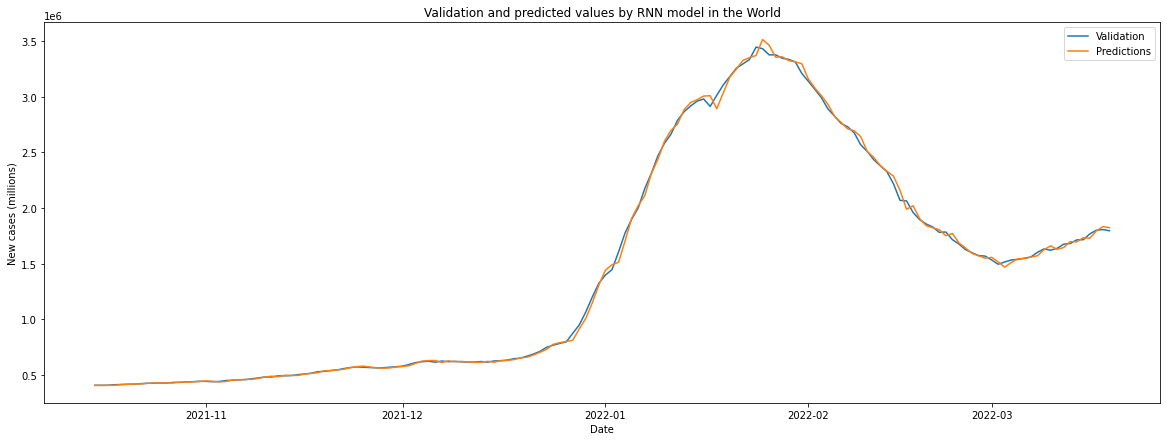

In [32]:
df = world_data["7_days_moving_average_new_cases"][6:]

window = 7

train_len = math.ceil(len(df)*0.8)
train_data = df[0:train_len]

x_train = []
y_train = []

for i in range(window, len(train_data)):
    x_train.append(train_data[i-window:i])
    y_train.append(train_data[i])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = df[train_len-window:]

x_test = []
y_test = []

for i in range(window, len(test_data)):
    x_test.append(test_data[i-window:i])
    y_test.append(test_data[i])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, activation="relu", input_shape=(x_train.shape[1], 1)))
model.add(SimpleRNN(50, return_sequences=False, activation="relu"))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))
opt = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=opt)
model.fit(x_train, y_train, epochs=100, batch_size=7, verbose=0)

predictions = model.predict(x_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))

valid = pd.DataFrame(df[train_len:])
valid['predictions'] = predictions

plt.figure(figsize=(20,7))
plt.title(f'Validation and predicted values by RNN model in the World')
plt.xlabel('Date')
plt.ylabel('New cases (millions)')
plt.plot(valid[['7_days_moving_average_new_cases','predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

## Predictions of new cases for the next 7 days

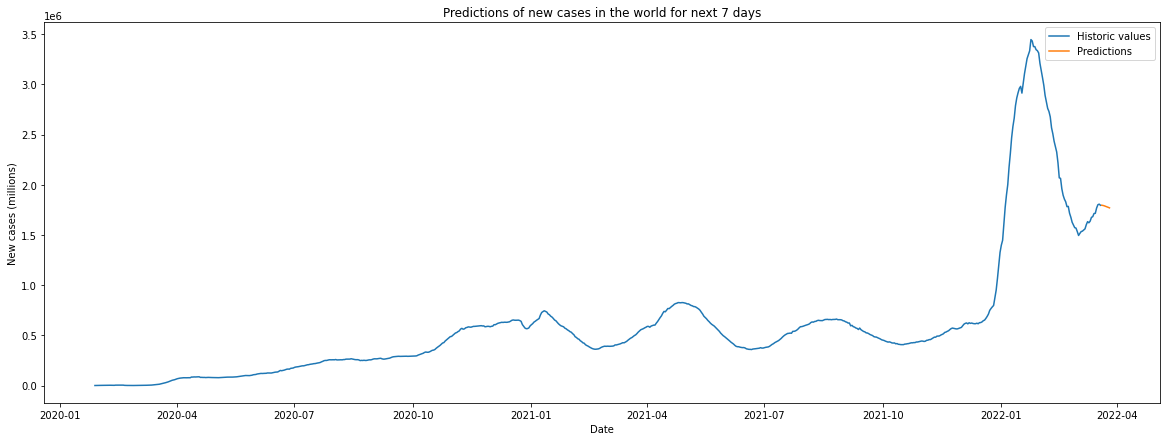

In [33]:
future_df = df.copy()

for i in range(1,window+1,1):
  last_7_days = future_df[-7:].values

  x_test = []
  x_test.append(last_7_days)
  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

  predictions = model.predict(x_test)

  idx = pd.date_range(future_df.index[-1], periods=2, freq='D')[1:]

  future_df = future_df.append(pd.Series(predictions[0][0], index=idx)).copy()

plt.figure(figsize=(20,7))
plt.title('Predictions of new cases in the world for next 7 days')
plt.xlabel('Date')
plt.ylabel('New cases (millions)')
plt.plot(future_df[:-window])
plt.plot(future_df[-window:])
plt.legend(['Historic values','Predictions'])
plt.show()

In [34]:
future_df.tail(8)

2022-03-19    1795623.000
2022-03-20    1795836.750
2022-03-21    1793753.625
2022-03-22    1789784.625
2022-03-23    1784804.125
2022-03-24    1779903.000
2022-03-25    1775052.625
2022-03-26    1769696.500
dtype: float64